In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

In [2]:
data = pd.read_csv("heart_2020_cleaned.csv")
data.head()

NameError: name 'pd' is not defined

# Data Cleaning

In [3]:
data.replace("Yes", 1, inplace = True)
data.replace("No", 0, inplace = True)
data.head()

NameError: name 'data' is not defined

In [4]:
data['Diabetic'].unique()

NameError: name 'data' is not defined

In [5]:
data.replace("Yes (during pregnancy)", 1, inplace = True)
data.replace("No, borderline diabetes", 0, inplace = True)

NameError: name 'data' is not defined

In [6]:
data["Sex"].unique()

NameError: name 'data' is not defined

In [7]:
data.replace("Female", 1, inplace = True)
data.replace("Male", 0, inplace = True)

NameError: name 'data' is not defined

In [8]:
data["AgeCategory"].unique()

NameError: name 'data' is not defined

In [80]:
data.replace("18-24", 0, inplace = True)
data.replace("25-29", 1, inplace = True)
data.replace("30-34", 2, inplace = True)
data.replace("35-39", 3, inplace = True)
data.replace("40-44", 4, inplace = True)
data.replace("45-49", 5, inplace = True)
data.replace("50-54", 6, inplace = True)
data.replace("55-59", 7, inplace = True)
data.replace("60-64", 8, inplace = True)
data.replace("65-69", 9, inplace = True)
data.replace("70-74", 10, inplace = True)
data.replace("75-79", 11, inplace = True)
data.replace("80 or older", 12, inplace = True)

In [81]:
data["Race"].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [82]:
data.replace("White", 0, inplace = True)
data.replace("Black", 1, inplace = True)
data.replace("Asian", 2, inplace = True)
data.replace("American Indian/Alaskan Native", 3, inplace = True)
data.replace("Hispanic", 4, inplace = True)
data.replace("Other", 5, inplace = True)

In [83]:
data["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [84]:
data.replace("Poor", 0, inplace = True)
data.replace("Fair", 1, inplace = True)
data.replace("Good", 2, inplace = True)
data.replace("Very good", 3, inplace = True)
data.replace("Excellent", 4, inplace = True)

# Naive Method

In [85]:
data['HeartDisease'].value_counts()[0]

292422

In [86]:
data['HeartDisease'].value_counts()[1]

27373

### Predict all 0's

In [87]:
accuracy = 292422/(292422+27373)
accuracy

0.9144045404086993

# Split Test and Train

In [88]:
data.shape

(319795, 18)

## Manually split

In [89]:
#70% train, 30% test

319795 * 0.7

223856.5

In [90]:
train = data.iloc[:223856, :]
test = data.iloc[223856:, :]

In [91]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,12,0,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,4,0,0,1,3,8.0,0,0,0


## Split using sklearn

In [92]:
X = data[['BMI', 'Smoking', 'AlcoholDrinking', "Stroke", 'PhysicalHealth', "MentalHealth", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer"]]
y = data.HeartDisease

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [94]:
test = pd.concat([X_test, y_test], axis=1)

## SMOTE

In [95]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
oversampled = SMOTE(random_state=0)
X_train_smote, y_train_smote = oversampled.fit_resample(X_train, y_train)

In [96]:
y_train_smote.value_counts()

0    204695
1    204695
Name: HeartDisease, dtype: int64

In [97]:
X_train_smote.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,31.63,0,0,0,0.0,0.0,0,0,4,4,0,1,4,6.0,0,0,0
1,27.98,1,0,0,0.0,0.0,0,0,10,0,1,1,1,8.0,0,0,0
2,26.58,1,0,0,0.0,0.0,0,0,5,0,0,1,4,6.0,0,0,0
3,33.28,1,0,0,0.0,23.0,0,1,10,0,1,1,2,8.0,0,0,0
4,26.57,0,0,0,0.0,0.0,0,1,0,4,0,0,3,8.0,0,0,0


In [98]:
train_smote = pd.concat([X_train_smote, y_train_smote], axis=1)
train_smote.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,31.63,0,0,0,0.0,0.0,0,0,4,4,0,1,4,6.0,0,0,0,0
1,27.98,1,0,0,0.0,0.0,0,0,10,0,1,1,1,8.0,0,0,0,1
2,26.58,1,0,0,0.0,0.0,0,0,5,0,0,1,4,6.0,0,0,0,0
3,33.28,1,0,0,0.0,23.0,0,1,10,0,1,1,2,8.0,0,0,0,0
4,26.57,0,0,0,0.0,0.0,0,1,0,4,0,0,3,8.0,0,0,0,0


In [1]:
def reverse_reformat(data):
    replacement_age = {0 : "18-24", 1 : "25-29", 2 : "30-34", 3 : "35-39", 4 : "40-44", 5 : "45-49", 6 : "50-54", 7: "55-59", 8: "60-64", 9: "65-69", 10: "70-74", 11:  "75-79", 12: "80 or older"}
    replacement_race = { 0: "White", 1: "Black", 2 : "Asian", 3: "American Indian/Alaskan Native",  4: "Hispanic", 5: "Other"}
    replacement_genhealth = {0: "Poor", 1: "Fair", 2: "Good", 3: "Verygood", 4: "Excellent"}
    replacement_bmi_cut = {0: '(11.937, 19.55]', 1: '(19.55, 27.08]', 2: '(27.08, 34.61]', 3: '(34.61, 42.14]', 4: '(42.14, 49.67]', 5: '(49.67, 57.2]', 6: '(57.2, 64.73]', 7: '(64.73, 72.26]', 8: '(72.26, 79.79]', 9: '(79.79, 87.32]', 10: '(87.32, 94.85]'}
    replacement_bmi_qcut = {0: '(12.019, 21.26]', 1: '(21.26, 23.01]', 2: '(23.01, 24.33]', 3: '(24.33, 25.61]', 4: '(25.61, 26.61]', 5: '(26.61, 27.89]', 6: '(27.89, 29.26]', 7: '(29.26, 31.0]', 8: '(31.0, 33.23]', 9: '(33.23, 36.92]', 10: '(36.92, 94.85]'}
    data['AgeCategory'].replace(replacement_age, inplace = True)
    data['Race'].replace(replacement_race, inplace = True)
    data['GenHealth'].replace(replacement_genhealth, inplace = True)

reverse_reformat(train_smote)
reverse_reformat(data)
train_smote.head()

NameError: name 'train_smote' is not defined

# Baseline Model Using Manually Split Train and Test

In [ ]:
baseline = sm.logit(formula = 'HeartDisease~BMI+Smoking+AlcoholDrinking+Stroke+PhysicalHealth+MentalHealth+DiffWalking+Sex+AgeCategory+Race+Diabetic+PhysicalActivity+GenHealth+SleepTime+Asthma+KidneyDisease+SkinCancer', data = train).fit()
baseline.summary()

# Confusion Matrix

In [101]:
from sklearn.metrics import roc_curve, auc
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))
    return pred_values

Classification accuracy = 91.6%
Precision = 59.3%
TPR or Recall = 6.0%
FNR = 94.0%
FPR = 0.4%
ROC-AUC = 83.9%


171466    0.275964
43807     0.071236
73864     0.054303
72981     0.444771
280780    0.009264
            ...   
31488     0.006810
117490    0.294914
131937    0.015379
80479     0.099238
21409     0.001714
Length: 95939, dtype: float64

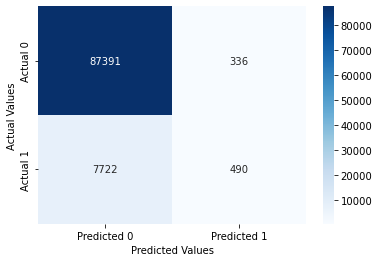

In [102]:
confusion_matrix_data(test,test.HeartDisease,baseline,0.6)

# Baseline Model Using SMOTE

In [114]:
model = sm.logit(formula = 'HeartDisease~BMI+Smoking+AlcoholDrinking+Stroke+PhysicalHealth+MentalHealth+DiffWalking+Sex+AgeCategory+Race+Diabetic+PhysicalActivity+GenHealth+SleepTime+Asthma+KidneyDisease+SkinCancer', data = train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.444383
         Iterations 7


In [115]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               409390
Model:                          Logit   Df Residuals:                   409354
Method:                           MLE   Df Model:                           35
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.3589
Time:                        17:45:33   Log-Likelihood:            -1.8193e+05
converged:                       True   LL-Null:                   -2.8377e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -2.9293      0.057    -51.167      0.000      -3.042      -2.817
AgeCategory[T.25-29]           0.2979      0.050      5.915      0.000       0.199       0.397
AgeCategory[T.30-34]           0.6011      0.047     12.896      0.000       0.510       0.692
AgeCategory[T.35-39]           0.8569      0.044     19.453      0.000       0.771       0.943
AgeCategory[T.40-44]           1.2022      0.042     28.594      0.000       1.120       1.285
AgeCategory[T.45-49]           1.5427      0.041     37.921      0.000       1.463       1.622
AgeCategory[T.50-54]           1.9871      0.039     50.655      0.000       1.910       2.064
AgeCategory[T.55-59]           2.3104      0.039     60.007      0.000       2.235       2.386
AgeCategory[T.60-64]           2.6257      0.038     68.923      0.000       2.551       2.700
AgeCategory[T.65-69]           2.9110      0.038     76.585      0.000       2.837       2.986
AgeCategory[T.70-74]           3.2515      0.038     85.209      0.000       3.177       3.326
AgeCategory[T.75-79]           3.5531      0.039     91.574      0.000       3.477       3.629
AgeCategory[T.80 or older]     3.6044      0.039     92.838      0.000       3.528       3.680
Race[T.Asian]                 -0.8495      0.046    -18.556      0.000      -0.939      -0.760
Race[T.Black]                 -1.3654      0.037    -37.240      0.000      -1.437      -1.294
Race[T.Hispanic]              -0.5061      0.035    -14.620      0.000      -0.574      -0.438
Race[T.Other]                 -0.9137      0.041    -22.124      0.000      -0.995      -0.833
Race[T.White]                 -0.1412      0.031     -4.545      0.000      -0.202      -0.080
GenHealth[T.Fair]              3.1064      0.020    156.401      0.000       3.067       3.145
GenHealth[T.Good]              2.0901      0.017    122.426      0.000       2.057       2.124
GenHealth[T.Poor]              4.0816      0.028    147.792      0.000       4.027       4.136
GenHealth[T.Verygood]          1.1017      0.017     64.206      0.000       1.068       1.135
BMI                            0.0073      0.001     10.372      0.000       0.006       0.009
Smoking                       -0.1826      0.009    -21.419      0.000      -0.199      -0.166
AlcoholDrinking               -1.8634      0.030    -61.580      0.000      -1.923      -1.804
Stroke                         0.0755      0.021      3.640      0.000       0.035       0.116
PhysicalHealth                -0.0052      0.001     -8.601      0.000      -0.006      -0.004
MentalHealth                   0.0076      0.001     13.410      0.000       0.006       0.009
DiffWalking                   -0.4525      0.013    -35.581      0.000      -0.477      -0.428
Sex                           -1.3631      0.009   -153.837      0.000      -1.380      -1.346
Diabetic                      -0.2224      0.012    -19.322      0.000      -0.245      -0.200
PhysicalAct

### Confusion matrix on SMOTE train data

Classification accuracy = 78.5%
Precision = 81.9%
TPR or Recall = 73.1%
FNR = 26.9%
FPR = 16.2%
ROC-AUC = 87.4%


0         0.060401
1         0.907374
2         0.094619
3         0.528703
4         0.022917
            ...   
409385    0.977277
409386    0.835079
409387    0.774414
409388    0.739895
409389    0.942376
Length: 409390, dtype: float64

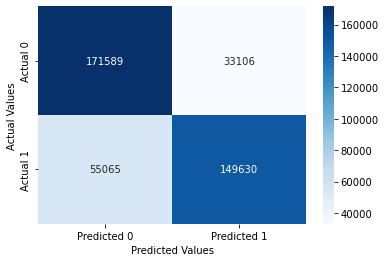

In [104]:
confusion_matrix_data(train_smote,train_smote.HeartDisease,model,0.6)

### Confusion matrix on entire dataset

Classification accuracy = 81.3%
Precision = 23.9%
TPR or Recall = 54.0%
FNR = 46.0%
FPR = 16.1%
ROC-AUC = 78.7%


0         0.045198
1         0.431221
2         0.801958
3         0.647883
4         0.033629
            ...   
319790    0.681259
319791    0.056859
319792    0.150476
319793    0.072715
319794    0.606151
Length: 319795, dtype: float64

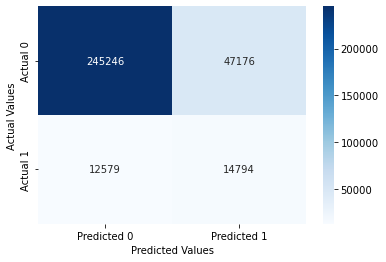

In [121]:
confusion_matrix_data(data,data.HeartDisease,model,0.6)

# Forward Stepwise Selection with SMOTE

In [106]:
X = train_smote[['BMI', 'Smoking', 'AlcoholDrinking', "Stroke", 'PhysicalHealth', "MentalHealth", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer"]]
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.logit('HeartDisease~' + '+'.join(predictor_subset),data = train_smote).fit()
    llr_pvalue = model.llr_pvalue
    return {"model":model, "llr_pvalue":llr_pvalue}
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['llr_pvalue'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [56]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['llr_pvalue'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [57]:
def forward_selection():
    models_best = pd.DataFrame(columns=["llr_pvalue", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [58]:
models_best = forward_selection()

Optimization terminated successfully.
         Current function value: 0.688789
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.690319
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.678547
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.689890
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.662103
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.692104
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.676878
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657472
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.596780
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.687098
  

Optimization terminated successfully.
         Current function value: 0.609324
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.557792
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637120
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.640449
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.626692
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.561568
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.642556
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.635049
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.643035
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.642692
  

Optimization terminated successfully.
         Current function value: 0.450138
         Iterations 7
Processed  2 models on 16 predictors in 5.971618413925171 seconds.
Optimization terminated successfully.
         Current function value: 0.449491
         Iterations 7
Processed  1 models on 17 predictors in 3.617435932159424 seconds.
Total elapsed time: 304.41484546661377 seconds.


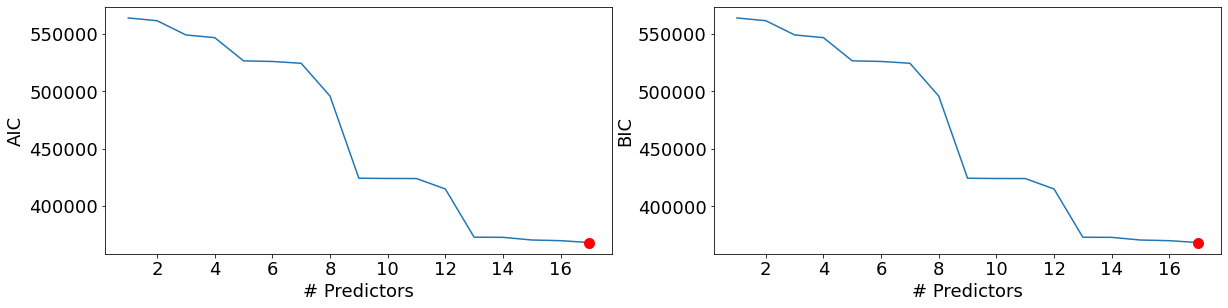

In [59]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    llr_pvalue = models_best.apply(lambda row: row[1].llr_pvalue, axis=1)

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 1)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [60]:
best_fwd_reg_model = models_best['model'][17]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               409390
Model:                          Logit   Df Residuals:                   409372
Method:                           MLE   Df Model:                           17
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                  0.3515
Time:                        18:59:10   Log-Likelihood:            -1.8402e+05
converged:                       True   LL-Null:                   -2.8377e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9685      0.037     26.514      0.000       0.897       1.040
BMI                  0.0083      0.001     12.123      0.000       0.007       0.010
Smoking             -0.1579      0.008    -18.764      0.000      -0.174      -0.141
AlcoholDrinking     -1.8456      0.030    -61.161      0.000      -1.905      -1.787
Stroke               0.0383      0.021      1.863      0.062      -0.002       0.079
PhysicalHealth      -0.0042      0.001     -7.571      0.000      -0.005      -0.003
MentalHealth         0.0078      0.001     13.986      0.000       0.007       0.009
DiffWalking         -0.4839      0.013    -38.599      0.000      -0.508      -0.459
Sex                 -1.3855      0.009   -157.448      0.000      -1.403      -1.368
AgeCategory          0.3179      0.002    191.949      0.000       0.315       0.321
Race                -0.1203      0.003    -36.348      0.000      -0.127      -0.114
Diabetic            -0.2254      0.011    -19.797      0.000      -0.248      -0.203
PhysicalActivity    -0.5479      0.010    -57.355      0.000      -0.567      -0.529
GenHealth           -1.0060      0.005   -189.411      0.000      -1.016      -0.996
SleepTime           -0.0310      0.003    -10.919      0.000      -0.037      -0.025
Asthma              -0.6575      0.014    -46.034      0.000      -0.685      -0.630
KidneyDisease       -0.4992      0.021    -23.254      0.000      -0.541      -0.457
SkinCancer          -0.5688      0.014    -40.869      0.000      -0.596      -0.542
====================================================================================
"""

In [71]:
best_fwd_reg_model.llr

199500.91079372313

Classification accuracy = 81.3%
Precision = 23.9%
TPR or Recall = 54.3%
FNR = 45.7%
FPR = 16.2%
ROC-AUC = 78.9%


0         0.040546
1         0.455574
2         0.795124
3         0.625702
4         0.033423
            ...   
319790    0.625158
319791    0.054809
319792    0.135472
319793    0.063468
319794    0.621256
Length: 319795, dtype: float64

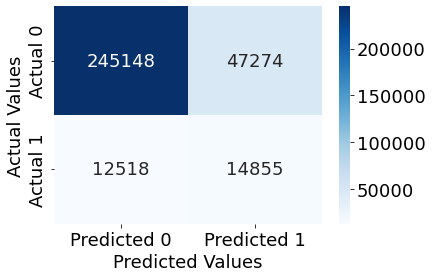

In [107]:
confusion_matrix_data(data,data.HeartDisease,best_fwd_reg_model,0.6)

# Subset Alcohol and SMOTE

Text(0.5, 1.0, 'Heart Disease Count for Alcohol and Non-Alcohol Drinkers')

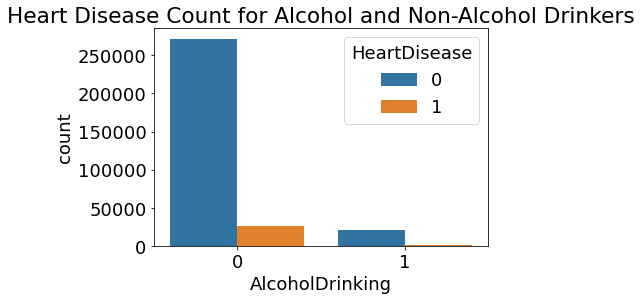

In [183]:
sns.countplot(x = 'AlcoholDrinking',hue = 'HeartDisease', data = data)
plt.title("Heart Disease Count for Alcohol and Non-Alcohol Drinkers")

## Alcohol Drinking = Yes

In [63]:
alcohol_yes = train_smote[train_smote.AlcoholDrinking == 1]
alcohol_yes.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
8,30.52,0,1,0,5.0,0.0,0,0,65-69,White,0,1,Good,8.0,0,0,0,0
12,32.92,0,1,0,30.0,5.0,1,1,75-79,White,0,1,Fair,10.0,0,0,0,0
37,30.54,1,1,0,0.0,0.0,0,0,45-49,AmericanIndianAlaskanNative,1,1,Good,7.0,0,0,0,0
41,25.68,1,1,0,0.0,0.0,0,0,55-59,White,0,1,Verygood,7.0,0,0,0,0
76,38.27,0,1,0,0.0,10.0,0,1,30-34,White,0,1,Good,6.0,0,0,0,0


In [64]:
alcohol_yes['HeartDisease'].value_counts()[0]

14397

In [65]:
alcohol_yes['HeartDisease'].value_counts()[1]

1673

In [66]:
data_alc_yes = data[data.AlcoholDrinking == 1]
data_alc_yes['HeartDisease'].value_counts()

0    20636
1     1141
Name: HeartDisease, dtype: int64

In [67]:
model_alc_yes = sm.logit(formula = 'HeartDisease~1', data = alcohol_yes).fit()
model_alc_yes.summary()

Optimization terminated successfully.
         Current function value: 0.334014
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                16070
Model:                          Logit   Df Residuals:                    16069
Method:                           MLE   Df Model:                            0
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:               9.753e-11
Time:                        17:38:20   Log-Likelihood:                -5367.6
converged:                       True   LL-Null:                       -5367.6
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1524      0.026    -83.330      0.000      -2.203      -2.102
==============================================================================
"""

Classification accuracy = 89.6%
Precision = nan%
TPR or Recall = 0.0%
FNR = 100.0%
FPR = 0.0%
ROC-AUC = 50.0%


C:\Users\annik\AppData\Local\Temp\ipykernel_23208\1691262903.py:16: RuntimeWarning: invalid value encountered in double_scalars
  precision = (cm[1,1])/(cm[0,1]+cm[1,1])


8         0.104107
12        0.104107
37        0.104107
41        0.104107
76        0.104107
            ...   
408724    0.104107
408924    0.104107
409144    0.104107
409277    0.104107
409295    0.104107
Length: 16070, dtype: float64

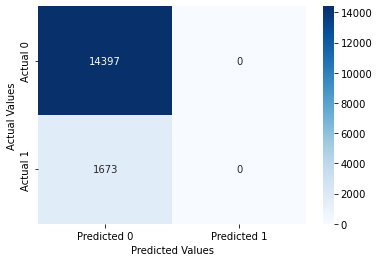

In [68]:
confusion_matrix_data(alcohol_yes,alcohol_yes.HeartDisease,model_alc_yes,0.6)

In [120]:
pred1 = model_alc_yes.predict(alcohol_yes)
pred1

8         0.104107
12        0.104107
37        0.104107
41        0.104107
76        0.104107
            ...   
408724    0.104107
408924    0.104107
409144    0.104107
409277    0.104107
409295    0.104107
Length: 16070, dtype: float64

In [121]:
pred1 = pred1.to_frame()
pred1['new'] = 0
pred1.drop(0, axis=1, inplace=True)
pred1.rename(columns={'new': 0}, inplace=True)
pred1

,0
8,0
12,0
37,0
41,0
76,0
...,...
408724,0
408924,0
409144,0
409277,0


## Alcohol Drinking = No

In [107]:
alcohol_no = train_smote[train_smote.AlcoholDrinking == 0]
alcohol_no

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,31.630000,0,0,0,0.0,0.000000,0,0,40-44,Hispanic,0,1,Excellent,6.000000,0,0,0,0
1,27.980000,1,0,0,0.0,0.000000,0,0,70-74,White,1,1,Fair,8.000000,0,0,0,1
2,26.580000,1,0,0,0.0,0.000000,0,0,45-49,White,0,1,Excellent,6.000000,0,0,0,0
3,33.280000,1,0,0,0.0,23.000000,0,1,70-74,White,1,1,Good,8.000000,0,0,0,0
4,26.570000,0,0,0,0.0,0.000000,0,1,18-24,Hispanic,0,0,Verygood,8.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409385,23.570000,1,0,0,30.0,0.000000,1,0,75-79,White,0,0,Poor,5.921736,0,0,0,1
409386,33.841957,1,0,0,0.0,10.000000,1,0,55-59,White,1,0,Fair,6.053981,0,0,0,1
409387,29.726817,0,0,0,0.0,15.000000,0,0,60-64,White,0,1,Good,6.000000,0,0,0,1
409388,27.860382,1,0,0,0.0,0.000000,0,0,65-69,White,0,0,Good,8.000000,1,0,0,1


In [108]:
model_alc_no = sm.logit(formula = 'HeartDisease~BMI+Smoking+Stroke+PhysicalHealth+MentalHealth+DiffWalking+Sex+AgeCategory+Race+Diabetic+PhysicalActivity+GenHealth+SleepTime+Asthma+KidneyDisease+SkinCancer', data = alcohol_no).fit()

Optimization terminated successfully.
         Current function value: 0.451604
         Iterations 7


Classification accuracy = 78.0%
Precision = 81.9%
TPR or Recall = 73.6%
FNR = 26.4%
FPR = 17.3%
ROC-AUC = 86.9%


0         0.059658
1         0.908514
2         0.093998
3         0.527446
4         0.022708
            ...   
409385    0.977867
409386    0.836335
409387    0.776580
409388    0.739318
409389    0.943171
Length: 393320, dtype: float64

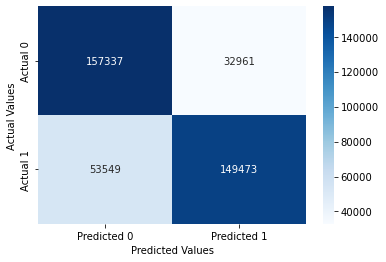

In [109]:
confusion_matrix_data(alcohol_no,alcohol_no.HeartDisease,model_alc_no,0.6)

Classification accuracy = 89.9%
Precision = 35.1%
TPR or Recall = 16.9%
FNR = 83.1%
FPR = 3.0%
ROC-AUC = 78.8%


0         0.043889
1         0.423285
2         0.802077
3         0.648035
4         0.033293
            ...   
319790    0.681462
319791    0.055099
319792    0.149333
319793    0.070590
319794    0.604360
Length: 298018, dtype: float64

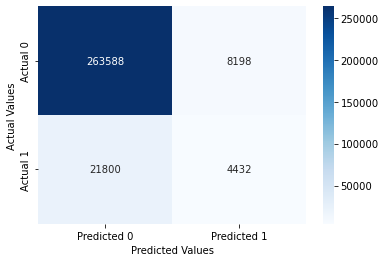

In [117]:
data_alc_no = data[data.AlcoholDrinking == 0]
confusion_matrix_data(data_alc_no,data_alc_no.HeartDisease,model_alc_no,0.87)

C:\Users\annik\AppData\Local\Temp\ipykernel_23208\1691262903.py:16: RuntimeWarning: invalid value encountered in double_scalars
  precision = (cm[1,1])/(cm[0,1]+cm[1,1])


Classification accuracy = 94.8%
Precision = nan%
TPR or Recall = 0.0%
FNR = 100.0%
FPR = 0.0%
ROC-AUC = 50.0%


55        0.104107
142       0.104107
176       0.104107
186       0.104107
201       0.104107
            ...   
319699    0.104107
319702    0.104107
319704    0.104107
319732    0.104107
319785    0.104107
Length: 21777, dtype: float64

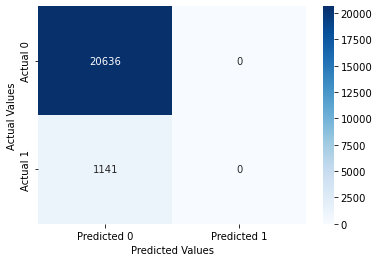

In [111]:
confusion_matrix_data(data_alc_yes,data_alc_yes.HeartDisease,model_alc_yes,0.6)

In [112]:
alc_error = (47062+11521+1141) / (224724+47062+11521+14711+20636+1141)
1-alc_error

0.8132428587063587

In [ ]:
pred2 = model.predict(not_zero)
pred2 = model.predict(test_not_zero)
pred2 = pred2.to_frame()
pred2

In [ ]:
pred2.loc[pred2[0] <= 0.4, 'pred'] = 'false' 
pred2.loc[pred2[0] > 0.4, 'pred'] = 'true'
map = {'false':0, 'true':1}
pred2 = pred2.applymap(lambda x: map.get(x) if x in map else x)
pred2.drop(0, axis=1, inplace=True)
pred2.rename(columns={'pred': 0}, inplace=True)
pred2

In [ ]:
pred = pd.concat([pred1, pred2])
pred.index.name = "Id"
pred = pred.sort_values("Id")
pred.index = np.arange(1, 319796)
pred.index.name = "Id"
pred.columns=["Category"]
pred

In [ ]:
confusion_matrix_data(train,train.HeartDisease,model,0.5)

Classification accuracy = 36.3%
Precision = 36.3%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 100.0%
ROC-AUC = 61.4%


1         0.311703
35        0.446752
40        0.253910
49        0.311785
59        0.324539
            ...   
223739    0.455393
223761    0.324085
223834    0.433544
223842    0.282251
223851    0.404752
Length: 8507, dtype: float64

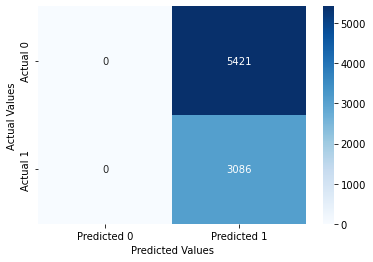

In [117]:
confusion_matrix_data(not_zero,not_zero.HeartDisease,model,0.1)

In [108]:
model2 = sm.logit(formula = 'HeartDisease~Stroke', data = only_zero).fit()

Optimization terminated successfully.
         Current function value: 0.265904
         Iterations 6


LinAlgError: Singular matrix

In [110]:
def confusion_matrix_test(pred_values,actual_values,cutoff=0.3):
    bins=np.array([0,cutoff,1])
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))

In [112]:
confusion_matrix_test(pred, train.HeartDisease, cutoff=0.4)

ValueError: The dimension of bins must be equal to the dimension of the  sample x.

In [114]:
pred

,Category
Id,
0,0
1,0
2,0
3,0
4,0
...,...
95934,0
95935,0
95936,0
